# Лабораторная работа №3

## Метод опорных векторов
#### Фазылова Алика группа:5140201/30301

### Задание 1
Постройте алгоритм метода опорных векторов типа "C-classification" с параметром C = 
1, используя ядро "linear". Визуализируйте разбиение пространства признаков на 
области с помощью полученной модели. Выведите количество полученных опорных 
векторов, а также ошибки классификации на обучающей и тестовой выборках. 


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [11]:
# Импортируем данные
svm1_train = pd.read_csv("svmdata1.txt", sep="	")
svm1_test = pd.read_csv("svmdata1test.txt", sep="	")

# Выделим признаки и классы
X_train = svm1_train.drop(columns=["Color"])
y_train = svm1_train["Color"]

X_test = svm1_test.drop(columns=["Color"])
y_test = svm1_test["Color"]

# Построим модель SVM
svm_model = svm.SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

# Подсчет количества векторов
support_vectors = svm_model.support_vectors_
num_sup_vectors = len(support_vectors)

# Предсказание на обучающей и тестовой выборках
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Подсчет точности 
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Количество опорных векторов:", num_sup_vectors)
print("Ошибка классификации на обучающей выборке:", 1 - train_accuracy)
print("Ошибка классификации на тестовой выборке:", 1 - test_accuracy)

Количество опорных векторов: 6
Ошибка классификации на обучающей выборке: 0.0
Ошибка классификации на тестовой выборке: 0.0


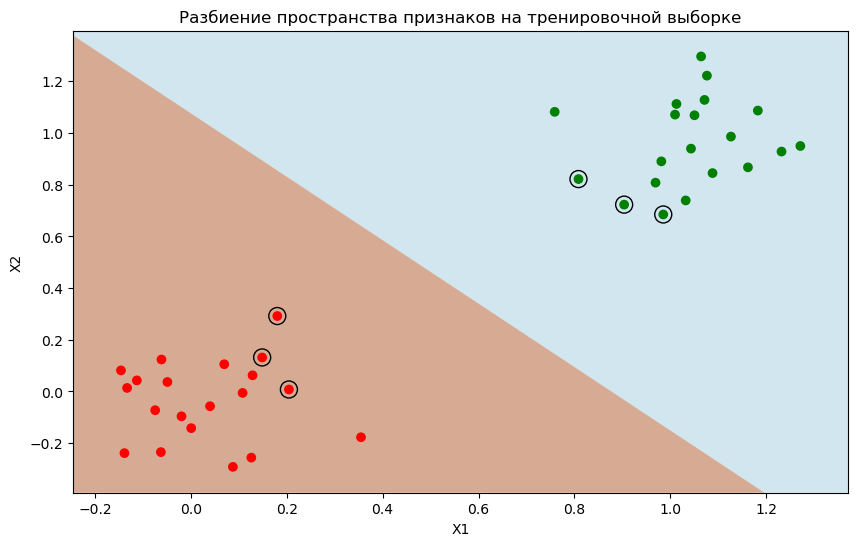

In [12]:
plt.figure(figsize=(10, 6))

# Построение сетки 
x_min, x_max = X_train["X1"].min() - 0.1, X_train["X1"].max() + 0.1
y_min, y_max = X_train["X2"].min() - 0.1, X_train["X2"].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001),
                     np.arange(y_min, y_max, 0.001))

# Предсказание для точек на сетке
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.where(Z == 'red', 1, -1)
Z = Z.reshape(xx.shape)

# Визуализация
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Paired,antialiased=True)
plt.scatter(X_train["X1"], X_train["X2"], c=y_train)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=150, facecolors='none', edgecolors='black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Разбиение пространства признаков на тренировочной выборке')
plt.show()


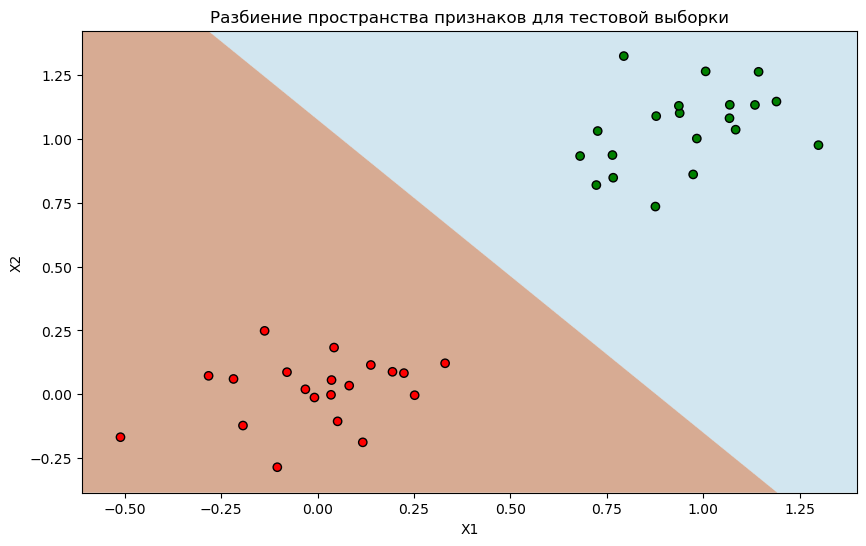

In [13]:
plt.figure(figsize=(10, 6))

# Построение сетки 
x_min, x_max = X_test["X1"].min() - 0.1, X_test["X1"].max() + 0.1
y_min, y_max = X_test["X2"].min() - 0.1, X_test["X2"].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001),
                     np.arange(y_min, y_max, 0.001))

# Предсказание для точек на сетке
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.where(Z == 'red', 1, -1)
Z = Z.reshape(xx.shape)

# Визуализация
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Paired,antialiased=True)
plt.scatter(X_test["X1"], X_test["X2"], c=y_test, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Разбиение пространства признаков для тестовой выборки')
plt.show()

### Задание 2
Используя алгоритм метода опорных векторов типа "C-classification" с линейным 
ядром, добейтесь нулевой ошибки сначала на обучающей выборке, а затем на 
тестовой, путем изменения параметра C. Выберите оптимальное значение данного 
параметра и объясните свой выбор. Всегда ли нужно добиваться минимизации ошибки 
на обучающей выборке? 


C, ошибка которой на тренировочной выборке равна 0: 483
C, ошибка которой на тестовой выборке равна 0: 1
С, при котором ошибка на тренировочной выборке равна ошибке на тестовой: C = 190, Ошибка: 0.020000000000000018


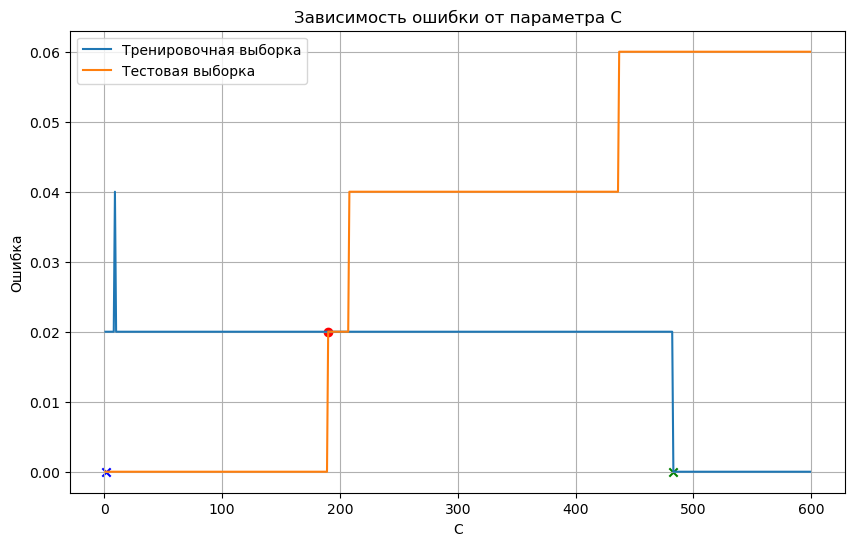

In [15]:
# Импортируем данные
svm2_train = pd.read_csv("svmdata2.txt", sep="	")
svm2_test = pd.read_csv("svmdata2test.txt", sep="	")

# Выделим признаки и классы
X_train = svm2_train.drop(columns=["Colors"])
y_train = svm2_train["Colors"]

X_test = svm2_test.drop(columns=["Colors"])
y_test = svm2_test["Colors"]

# Списки для сохранения значений ошибок
train_errors = []
test_errors = []

C_values = np.arange(1, 600, 1)

for C in C_values:
    # Построим модель SVM
    svm_model = svm.SVC(kernel='linear', C=C)
    svm_model.fit(X_train, y_train)

    # Предсказание на обучающей и тестовой выборках
    y_train_pred = svm_model.predict(X_train)
    y_test_pred = svm_model.predict(X_test)

    # Подсчет ошибки
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)

    # Добавление ошибок в списки
    train_errors.append(train_error)
    test_errors.append(test_error)

# Найдем C, ошибка которой на тренировочной выборке равна 0
С_zero_train = C_values[np.argmin(train_errors)]

# Найдем C, ошибка которой на тестовой выборке равна 0
C_zero_test = C_values[np.argmin(test_errors)]

print(f"C, ошибка которой на тренировочной выборке равна 0: {С_zero_train}")
print(f"C, ошибка которой на тестовой выборке равна 0: {C_zero_test}")

# Найдем С, где ошибки равны
equality_index = np.argmin(np.abs(np.array(train_errors) - np.array(test_errors)))
equality_C = C_values[equality_index]
equality_error = train_errors[equality_index]

print(f"С, при котором ошибка на тренировочной выборке равна ошибке на тестовой: C = {equality_C}, Ошибка: {equality_error}")

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_errors, label='Тренировочная выборка')
plt.plot(C_values, test_errors, label='Тестовая выборка')
plt.scatter([equality_C], [equality_error], color='red')  # Метка для точки пересечения
plt.scatter([С_zero_train], [0], color='green', marker='x')  # Метка для C с ошибкой на тренировочной равной 0
plt.scatter([C_zero_test], [0], color='blue', marker='x')  # Метка для C с ошибкой на тестовой равной 0
plt.xlabel('C')
plt.ylabel('Ошибка')
plt.title('Зависимость ошибки от параметра С')
plt.grid(True)
plt.legend()
plt.show()


In [16]:
def plot_svm(X, y, svm_model, C_value, subplot_position):
    plt.subplot(subplot_position)

    # Построение сетки
    x_min, x_max = X["X1"].min() - 0.1, X["X1"].max() + 0.1
    y_min, y_max = X["X2"].min() - 0.1, X["X2"].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001),
                         np.arange(y_min, y_max, 0.001))

    # Предсказание для точек на сетке
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.where(Z == 'red', 1, -1)
    Z = Z.reshape(xx.shape)

    # Визуализация
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Paired,antialiased=True)
    plt.scatter(X["X1"], X["X2"], c=y, edgecolors='k')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f'Разбиение (Тестовая выборка) C={C_value}')

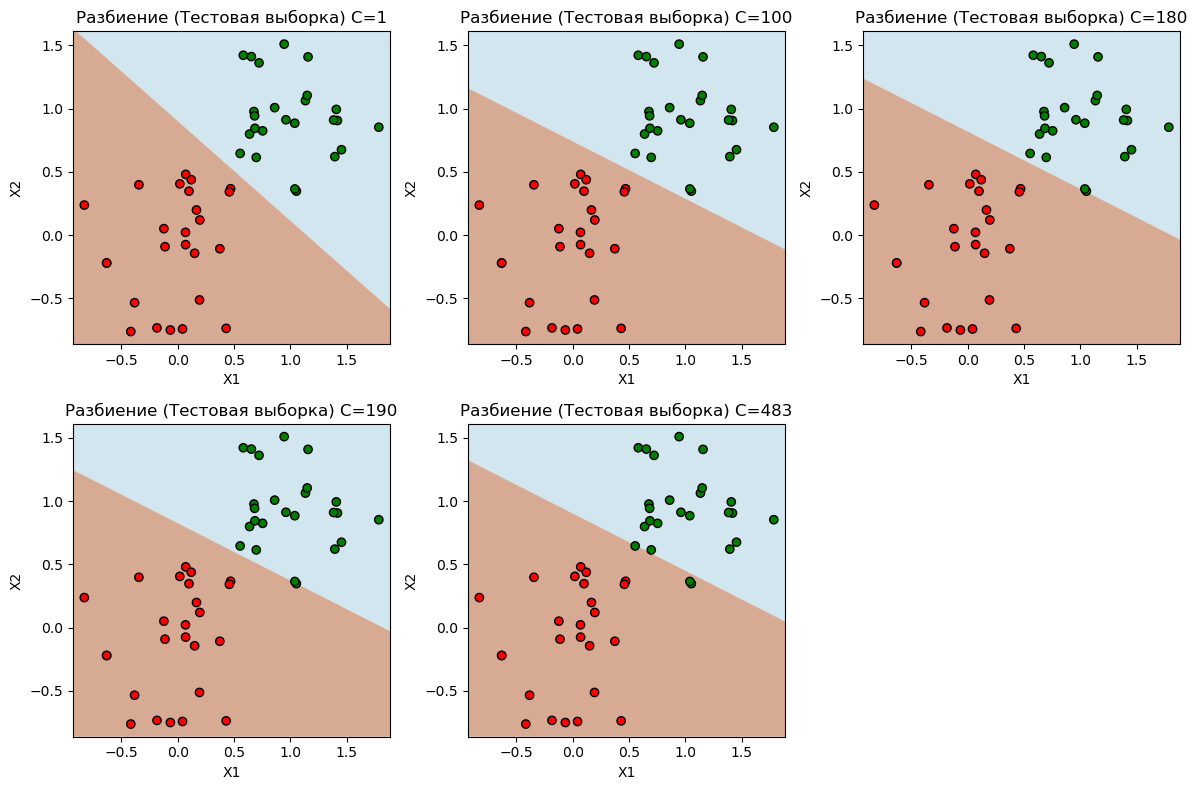

In [17]:
plt.figure(figsize=(12, 8))

# Зададим позиции для графиков
subplot_positions = [231, 232, 233, 234, 235]

C_values = [1, 100, 180, 190, 483]

for idx, C_value in enumerate(C_values):
    svm_model = svm.SVC(kernel='linear', C=C_value)
    svm_model.fit(X_train, y_train)
    plot_svm(X_test, y_test, svm_model, C_value, subplot_positions[idx])

plt.tight_layout()
plt.show()

#### Ответ
Оптимальное значение С должно лежать на интервале $С\in[1;9)\cup(9;190)$ так как на нем значение ошибки при предсказании на тестовых данных минимально, а на тренировочных оно стабильно и не растет на всей оси (9 не включается, так как при предсказании на тренировочной выборке при этом числе заметен скачок ошибки, однако стоит заметить, что на тестовой выборке он отсутсвует). Однако исследуя графики,можно заметить, чем больше значение С приближается к 190, тем меньше становится зазор(margin), а значит и хуже обобщающие способности модели. Поэтому оптимальным значением С будет минимальное значение. Так оптимальное значение $C=1$  
При $С>=190$ ошибка при тестировании на тестовых данных начинает расти. Несмотря на то что при $С=483$ ошибка для тренировочных данных уменьшилась до нуля, для тестовых же данных она увеличилась с 0 до 0,06.
Таким образом нет необходимости добиваться минимизации ошибки на обучающей выборке, так как это может приводить к переобучению модели, и потери способности обобщения модели на новых данных


### Задание 3
Среди ядер "polynomial", "radial" и "sigmoid" выберите оптимальное в плане 
количества ошибок на тестовой выборке.Попробуйте различные значения параметра 
degree для полиномиального ядра.


In [18]:
# Импортируем данные
svm_data3 = pd.read_csv("svmdata3.txt", sep="	")

# Выделим признаки и классы
X = svm_data3.drop(columns=["Colors"])
y = svm_data3["Colors"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=34543)

In [19]:
def svm_kernel(kernel):
    # Построим модель SVM
    svm_model = svm.SVC(kernel=kernel, C=1)
    svm_model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_test_pred = svm_model.predict(X_test)

    # Подсчет ошибки на тестовой выборке
    test_error = 1 - accuracy_score(y_test, y_test_pred)

    print(f"Ошибка классификации на тестовой выборке (ядро {kernel}):", test_error)


In [20]:
svm_kernel('poly')

Ошибка классификации на тестовой выборке (ядро poly): 0.625


In [21]:
svm_kernel('rbf')

Ошибка классификации на тестовой выборке (ядро rbf): 0.15000000000000002


In [22]:
svm_kernel('sigmoid')

Ошибка классификации на тестовой выборке (ядро sigmoid): 0.7


Меньшая ошибка достигается при ядре Radial(rbf) равная 0.15, это ядро самое оптимальное

Изменим параметр degree для полиномиального ядра, и найдем его оптимальное значение.

In [23]:
degrees = np.arange(1, 15)
min_test_error = 1
best_degree = 0

for degree in degrees:
    # Построим модель SVM
    svm_model = svm.SVC(kernel='poly', C=1, degree=degree)
    svm_model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_test_pred = svm_model.predict(X_test)

    # Подсчет ошибки на тестовой выборке
    test_error = 1 - accuracy_score(y_test, y_test_pred)

    # Обновление минимальной ошибки и соответствующего значения degree
    if test_error < min_test_error:
        min_test_error = test_error
        best_degree = degree

    print("degree:", degree)
    print("Ошибка классификации на тестовой выборке:", test_error)

# Вывод результатов
print("Лучшее значение degree:", best_degree)
print("Минимальная ошибка на тестовой выборке:", min_test_error)


degree: 1
Ошибка классификации на тестовой выборке: 0.625
degree: 2
Ошибка классификации на тестовой выборке: 0.07499999999999996
degree: 3
Ошибка классификации на тестовой выборке: 0.625
degree: 4
Ошибка классификации на тестовой выборке: 0.19999999999999996
degree: 5
Ошибка классификации на тестовой выборке: 0.625
degree: 6
Ошибка классификации на тестовой выборке: 0.19999999999999996
degree: 7
Ошибка классификации на тестовой выборке: 0.625
degree: 8
Ошибка классификации на тестовой выборке: 0.19999999999999996
degree: 9
Ошибка классификации на тестовой выборке: 0.625
degree: 10
Ошибка классификации на тестовой выборке: 0.19999999999999996
degree: 11
Ошибка классификации на тестовой выборке: 0.625
degree: 12
Ошибка классификации на тестовой выборке: 0.19999999999999996
degree: 13
Ошибка классификации на тестовой выборке: 0.625
degree: 14
Ошибка классификации на тестовой выборке: 0.19999999999999996
Лучшее значение degree: 2
Минимальная ошибка на тестовой выборке: 0.07499999999999996

При выборе оптимального значения degree = 2 для полиномиального ядра ошибка стала равной 0.074, что меньше, чем для ранее выбранного оптимального ядра radial (0.15), для которого оптимальные параметры мы не находили.

### Задание 4
Среди ядер "polynomial", "radial" и "sigmoid" выберите оптимальное в плане количества 
ошибок на тестовой выборке. 


In [24]:
# Импортируем данные
svm4_train = pd.read_csv("svmdata4.txt", sep="	")
svm4_test = pd.read_csv("svmdata4test.txt", sep="	")

# Выделим признаки и классы
X_train = svm4_train.drop(columns=["Colors"])
y_train = svm4_train["Colors"]

X_test = svm4_test.drop(columns=["Colors"])
y_test = svm4_test["Colors"]

In [25]:
svm_kernel('poly')

Ошибка классификации на тестовой выборке (ядро poly): 0.20999999999999996


In [26]:
svm_kernel('rbf')

Ошибка классификации на тестовой выборке (ядро rbf): 0.10499999999999998


In [27]:
svm_kernel('sigmoid')

Ошибка классификации на тестовой выборке (ядро sigmoid): 0.41500000000000004


Оптимальным ядром в плане количества ошибок на тестовой выборке является Radial(rbf) с ошибкой 0.104

### Задание 5
 Среди ядер "polynomial", "radial" и "sigmoid" выберите оптимальное в плане количества 
ошибок на тестовой выборке. Изменяя значение параметра gamma, продемонстрируйте 
эффект переобучения, выполните при этом визуализацию разбиения пространства 
признаков на области. 

In [28]:
# Импортируем данные
svm5_train = pd.read_csv("svmdata5.txt", sep="	")
svm5_test = pd.read_csv("svmdata5test.txt", sep="	")

# Выделим признаки и классы
X_train = svm5_train.drop(columns=["Colors"])
y_train = svm5_train["Colors"]

X_test = svm5_test.drop(columns=["Colors"])
y_test = svm5_test["Colors"]

y_train = LabelEncoder().fit_transform(y_train) #red 1, green 0
y_test = LabelEncoder().fit_transform(y_test)

In [32]:
def plot_svm5_test(X, y):

    # Построение сетки
    x_min, x_max = X["X1"].min() - 0.1, X["X1"].max() + 0.1
    y_min, y_max = X["X2"].min() - 0.1, X["X2"].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001),
                         np.arange(y_min, y_max, 0.001))
    
    # Предсказание для точек на сетке
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap = ListedColormap(['green','red'])
    colors = np.where(y_test == 0, 'green','red' )
    
    # Визуализация
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap,antialiased=True)
    plt.scatter(X_test["X1"], X_test["X2"], c=colors, edgecolors='k')
    
    plt.scatter(X["X1"], X["X2"], c=colors, edgecolors='k')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f'Разбиение (Тестовая выборка)')
    plt.show()

In [35]:
def svm_err_test(kernel):
    
    # Предсказание на тестовой выборке
    y_test_pred = svm_model.predict(X_test)

    # Подсчет ошибки на тестовой выборке
    test_error = 1 - accuracy_score(y_test, y_test_pred)

    print(f"Ошибка классификации на тестовой выборке (ядро {kernel}):", test_error)

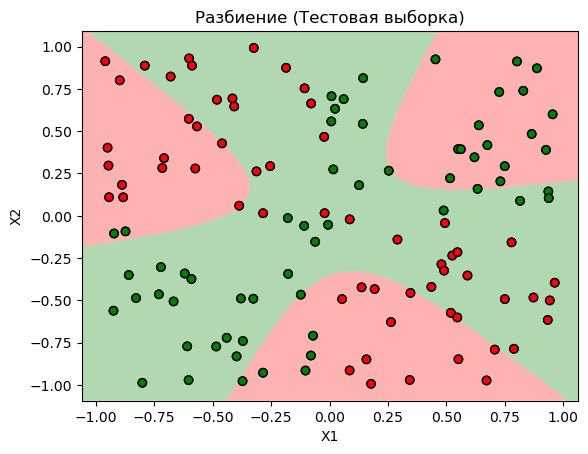

Ошибка классификации на тестовой выборке (ядро poly): 0.4916666666666667


In [36]:
# Задание модели
svm_model = svm.SVC(kernel='poly', C=1)
svm_model.fit(X_train, y_train)

plot_svm5_test(X_test, y_test) 
svm_err_test('poly')


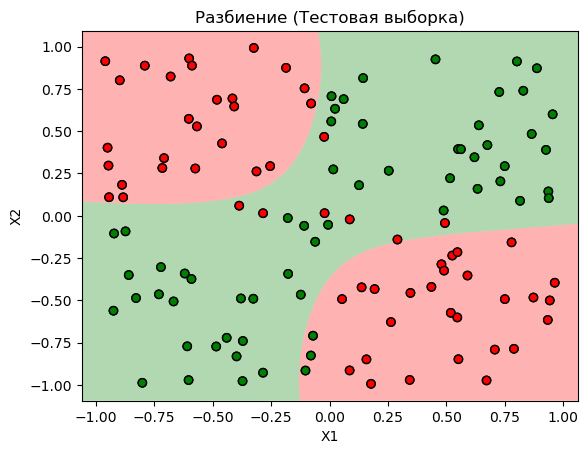

Ошибка классификации на тестовой выборке (ядро radial): 0.08333333333333337


In [37]:
svm_model = svm.SVC(kernel='rbf', C=1)
svm_model.fit(X_train, y_train)

plot_svm5_test(X_test, y_test) 
svm_err_test('radial')    

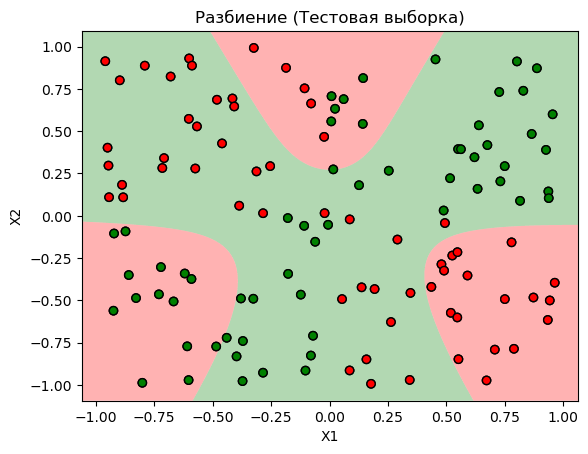

Ошибка классификации на тестовой выборке (ядро sigmoid): 0.4833333333333333


In [39]:
svm_model = svm.SVC(kernel='sigmoid', C=1)
svm_model.fit(X_train, y_train)

plot_svm5_test(X_test, y_test) 
svm_err_test('sigmoid')      

Наиболее оптимальное ядро Radial c наименьшей ошибкой 0.83  
Изменим для него параметр gamma и продемонстрируем эффект переобучения

In [40]:
def plot_svm5_train(X_train, y_train, subplot_position, svm_model):
    plt.subplot(subplot_position)

    # Построение сетки
    x_min, x_max = X_train["X1"].min() - 0.1, X_train["X1"].max() + 0.1
    y_min, y_max = X_train["X2"].min() - 0.1, X_train["X2"].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001),
                         np.arange(y_min, y_max, 0.001))

    # Предсказание для точек на сетке
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap = ListedColormap(['green', 'red'])
    colors = np.where(y_train == 0, 'green', 'red')

    # Визуализация
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap, antialiased=True)
    plt.scatter(X_train["X1"], X_train["X2"], c=colors, edgecolors='k')

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f'Разбиение (Тренировочная выборка) - Gamma={svm_model.gamma}')

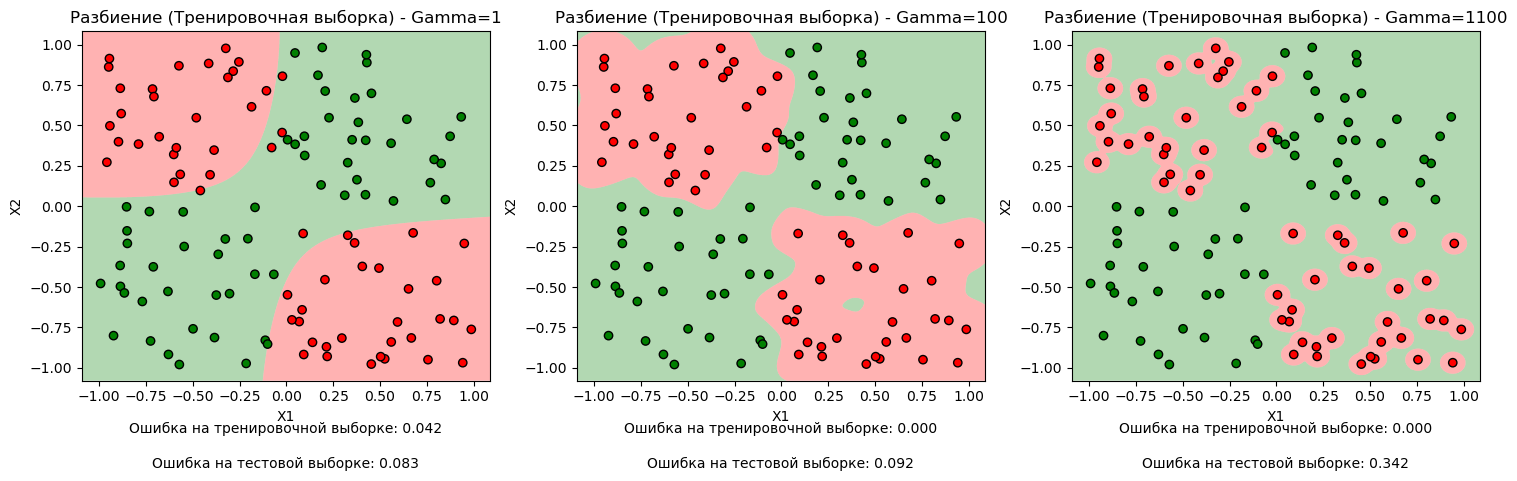

In [41]:
subplot_positions = [131, 132, 133]

gammas = [1, 100, 1100]

plt.figure(figsize=(15, 5))

for idx, gamma in enumerate(gammas):
    svm_model = svm.SVC(kernel='rbf', C=1, gamma=gamma)
    svm_model.fit(X_train, y_train)
    plot_svm5_train(X_train, y_train, subplot_positions[idx], svm_model)   
    train_error = 1 - accuracy_score(y_train, svm_model.predict(X_train))
    plt.text(0.5, -0.15, f'Ошибка на тренировочной выборке: {train_error:.3f}', ha='center', transform=plt.gca().transAxes, fontsize=10)
    test_error = 1 - accuracy_score(y_test, svm_model.predict(X_test))
    plt.text(0.5, -0.25, f'Ошибка на тестовой выборке: {test_error:.3f}', ha='center', transform=plt.gca().transAxes, fontsize=10)


plt.tight_layout()
plt.show()

На графиках видно с увеличением значения gamma модель все больше подстраивается под обучающие данные, ошибка для них падает, а ошибка для тестовых данных растет. Таким образом мы наблюдаем переобучение модели.

### Задание 6
Постройте алгоритм метода опорных векторов типа "eps-regression" с параметром C = 1, 
используя ядро "radial". Отобразите на графике зависимость среднеквадратичной 
ошибки на обучающей выборке от значения параметра ε. Прокомментируйте 
полученный результат.


In [109]:
# Импортируем данные
svm_data6 = pd.read_csv("svmdata6.txt", sep="	")

# Выделим признаки и классы
X = svm_data6["X"]
y = svm_data6["Y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=34543)

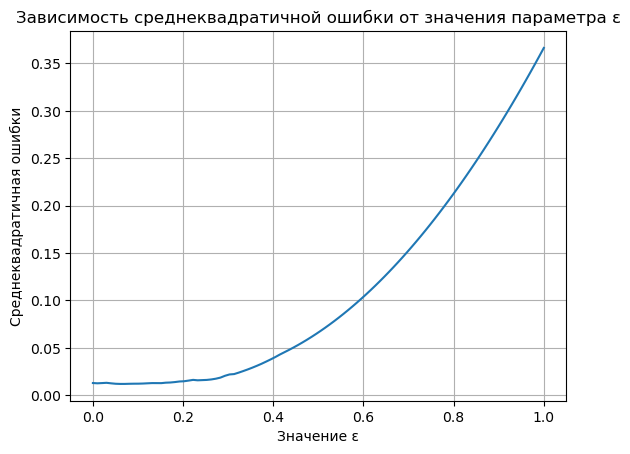

In [92]:
# Подготовка данных
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

# Параметры SVM
epsilon_values = np.linspace(0, 1, 100)  # Значения параметра эпсилон

# Обучение модели для разных значений epsilon
mse_values = []
for epsilon in epsilon_values:
    svr = SVR(kernel='rbf', C=1, epsilon=epsilon)
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_train)
    mse = mean_squared_error(y_train, y_pred)
    mse_values.append(mse)

# Построение графика
plt.plot(epsilon_values, mse_values)
plt.title('Зависимость среднеквадратичной ошибки от значения параметра ε')
plt.xlabel('Значение ε')
plt.ylabel('Среднеквадратичная ошибки')
plt.grid(True)
plt.show()


С увеличение эпсилон растет стреднеквадратичная ошибка. Параметр ε можно представить как ширину полосы вокруг аппроксимирующей линии на графике. С увеличением ε полоса будет становится шире, что может означать, что модель становится более терпимой к отклонениям от точек данных, выбросам, однако точность аппроксимации при этом у модели будет падать.